# Segment industry images

In [1]:
%matplotlib inline
import os, sys, glob, time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import draw
from scipy import interpolate

### loading image

In [2]:
path_image = os.path.abspath(os.path.join('data-images', 'other', 'industry.jpg'))
img = Image.open(path_image)
img = img.resize((int(img.width * 0.5), int(img.height * 0.5)), Image.ANTIALIAS)
img = np.array(img)
print ('image dimension: %s' % repr(img.shape))

image dimensio: (960, 1280, 4)


## Transfer image from Cartesian to Radial

### Setting the centre and mask between circles

In [3]:
centre = (460, 640)

mask = np.zeros(img.shape[:2], dtype=bool)
rr, cc = draw.circle(centre[0], centre[1], 350, mask.shape)
mask[rr, cc] = 1
rr, cc = draw.circle(centre[0], centre[1], 100, mask.shape)
mask[rr, cc] = 0

plt.subplot(1, 2, 1), plt.imshow(img)
plt.subplot(1, 2, 2), plt.imshow(mask)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f804bfd9790>,
 <matplotlib.image.AxesImage at 0x7f8049e8e990>)

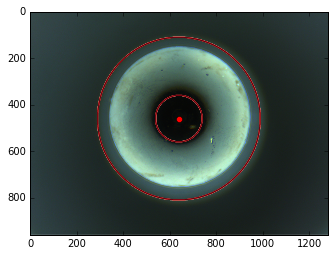

In [4]:
plt.imshow(img), plt.contour(mask, cmap=plt.cm.Reds)
plt.plot(centre[1], centre[0], 'ro')
_= plt.xlim([0, img.shape[1]]), plt.ylim([img.shape[0], 0])

### Compute new coordinate system

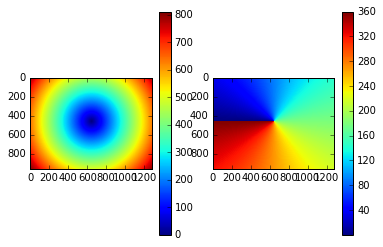

In [5]:
grid_x, grid_y = np.mgrid[0:img.shape[0], 0:img.shape[1]]
grid_x -= centre[0]
grid_y -= centre[1]
dist = np.sqrt(grid_x ** 2 + grid_y ** 2)
angle = np.rad2deg(np.arctan2(grid_x, grid_y)) + 180

_= plt.subplot(1, 2, 1), plt.imshow(dist), plt.colorbar()
_= plt.subplot(1, 2, 2), plt.imshow(angle), plt.colorbar()

### Interpolate new coordinates

points shape: (353348, 2)
grids shape: (250, 360) (250, 360)


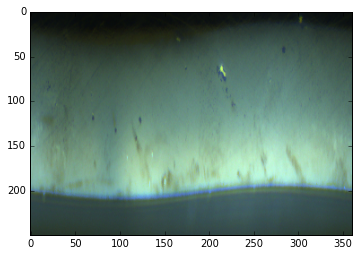

In [6]:
points = np.array([dist[mask].ravel(), angle[mask].ravel()]).T
print ('points shape: %s' % repr(points.shape))
grid_dist, grid_angle = np.mgrid[np.min(points[:, 0]):np.max(points[:, 0]), np.min(points[:, 1]):np.max(points[:, 1])]
print ('grids shape: %s %s' % (repr(grid_dist.shape), repr(grid_angle.shape)))

grid_z = []
for i in range(img.shape[2]):
    values = img[mask, i].ravel()
    values_new = interpolate.griddata(points, values, (grid_dist, grid_angle), method='nearest') # 'nearest', 'linear', 'cubic'    
    grid_z.append(values_new)
    
img_rad = np.rollaxis(np.array(grid_z), 0, 3)
_= plt.imshow(img_rad)